In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Final_CSVs/singal_csv/combine_dataset.csv')

In [3]:
print(df.describe().T)

                            count          mean            std           min  \
img_no                    11832.0   5915.500000    3415.748527  0.000000e+00   
area                      11832.0  12107.747295   33344.483685  7.100000e+01   
bbox-0                    11832.0    152.872972     145.501337  0.000000e+00   
bbox-1                    11832.0    180.229462     178.493655  0.000000e+00   
bbox-2                    11832.0    252.858857     150.493227  1.000000e+00   
bbox-3                    11832.0    299.469912     195.293846  1.000000e+00   
bbox_area                 11832.0  33020.895791   84308.766262  7.200000e+01   
centroid-0                11832.0    202.416966     133.737039  0.000000e+00   
centroid-1                11832.0    239.987850     168.447276  0.000000e+00   
convex_area               11832.0  26765.656271   71348.842186  7.200000e+01   
eccentricity              11832.0      0.848338       0.142836  1.245593e-01   
equivalent_diameter       11832.0     67

In [4]:
print(df.isnull().sum())

img_no                      0
area                        0
bbox-0                      0
bbox-1                      0
bbox-2                      0
bbox-3                      0
bbox_area                   0
centroid-0                  0
centroid-1                  0
convex_area                 0
eccentricity                0
equivalent_diameter         0
euler_number                0
extent                      0
filled_area                 0
inertia_tensor_eigvals-0    0
inertia_tensor_eigvals-1    0
local_centroid-0            0
local_centroid-1            0
major_axis_length           0
minor_axis_length           0
moments_hu-0                0
moments_hu-1                0
moments_hu-2                0
moments_hu-3                0
moments_hu-4                0
moments_hu-5                0
moments_hu-6                0
orientation                 0
perimeter                   0
slice                       0
solidity                    0
label                       0
dtype: int

In [5]:
print(df.dtypes)

img_no                        int64
area                          int64
bbox-0                        int64
bbox-1                        int64
bbox-2                        int64
bbox-3                        int64
bbox_area                     int64
centroid-0                  float64
centroid-1                  float64
convex_area                   int64
eccentricity                float64
equivalent_diameter         float64
euler_number                  int64
extent                      float64
filled_area                   int64
inertia_tensor_eigvals-0    float64
inertia_tensor_eigvals-1    float64
local_centroid-0            float64
local_centroid-1            float64
major_axis_length           float64
minor_axis_length           float64
moments_hu-0                float64
moments_hu-1                float64
moments_hu-2                float64
moments_hu-3                float64
moments_hu-4                float64
moments_hu-5                float64
moments_hu-6                

<AxesSubplot:xlabel='label', ylabel='count'>

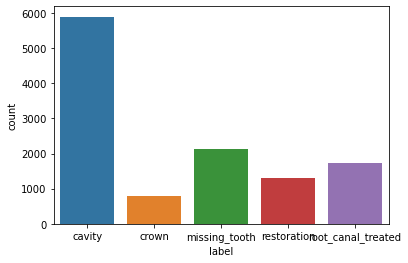

In [6]:
sns.countplot(x='label', data=df)

In [7]:
print(df['label'].value_counts())

cavity                5892
missing_tooth         2123
root_canal_treated    1729
restoration           1298
crown                  790
Name: label, dtype: int64


In [8]:
y = df['label'].values
print(np.unique(y))

['cavity' 'crown' 'missing_tooth' 'restoration' 'root_canal_treated']


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y)
print(np.unique(Y))

[0 1 2 3 4]


In [10]:
X = df.drop(labels = ['label', 'img_no', 'slice'], axis=1)
print(X.describe().T)

                            count          mean            std           min  \
area                      11832.0  12107.747295   33344.483685  7.100000e+01   
bbox-0                    11832.0    152.872972     145.501337  0.000000e+00   
bbox-1                    11832.0    180.229462     178.493655  0.000000e+00   
bbox-2                    11832.0    252.858857     150.493227  1.000000e+00   
bbox-3                    11832.0    299.469912     195.293846  1.000000e+00   
bbox_area                 11832.0  33020.895791   84308.766262  7.200000e+01   
centroid-0                11832.0    202.416966     133.737039  0.000000e+00   
centroid-1                11832.0    239.987850     168.447276  0.000000e+00   
convex_area               11832.0  26765.656271   71348.842186  7.200000e+01   
eccentricity              11832.0      0.848338       0.142836  1.245593e-01   
equivalent_diameter       11832.0     67.475814     104.230492  9.507892e+00   
euler_number              11832.0    -35

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
print(X)

[[1.81496316e-03 0.00000000e+00 1.63884674e-01 ... 9.21749226e-05
  2.07921924e-02 4.18652604e-01]
 [3.30435055e-01 1.95312500e-03 0.00000000e+00 ... 2.12747173e-02
  3.95281949e-01 4.72288997e-01]
 [8.09531686e-01 1.95312500e-03 0.00000000e+00 ... 8.50336935e-02
  5.43763475e-01 6.44018610e-01]
 ...
 [5.67734783e-04 5.62500000e-01 6.98027314e-02 ... 6.35909401e-01
  4.02724130e-03 5.67922942e-01]
 [7.41273872e-02 6.48437500e-01 2.77693475e-01 ... 9.71254442e-01
  6.04114405e-02 7.83122492e-01]
 [6.62506258e-03 9.31640625e-01 4.67374810e-01 ... 9.74430361e-01
  1.10485351e-02 8.75693822e-01]]


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8874, 30)
(2958, 30)
(8874,)
(2958,)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [16]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, 
                   validation_data=(x_test, y_test))

Epoch 1/100
139/139 [==============================] - 1s 8ms/step - loss: 1.4439 - accuracy: 0.4600 - val_loss: 1.3474 - val_accuracy: 0.5135
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 1.3815 - accuracy: 0.4928 - val_loss: 1.3460 - val_accuracy: 0.5135
Epoch 3/100
139/139 [==============================] - 0s 3ms/step - loss: 1.3767 - accuracy: 0.4928 - val_loss: 1.3453 - val_accuracy: 0.5135
Epoch 4/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3751 - accuracy: 0.4928 - val_loss: 1.3456 - val_accuracy: 0.5135
Epoch 5/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3752 - accuracy: 0.4928 - val_loss: 1.3441 - val_accuracy: 0.5135
Epoch 6/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3722 - accuracy: 0.4928 - val_loss: 1.3447 - val_accuracy: 0.5135
Epoch 7/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3752 - accuracy: 0.4928 - val_loss: 1.3429 - val_accuracy: 0.5135

Epoch 58/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3631 - accuracy: 0.4928 - val_loss: 1.3423 - val_accuracy: 0.5135
Epoch 59/100
139/139 [==============================] - 1s 5ms/step - loss: 1.3632 - accuracy: 0.4928 - val_loss: 1.3427 - val_accuracy: 0.5135
Epoch 60/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3631 - accuracy: 0.4928 - val_loss: 1.3423 - val_accuracy: 0.5135
Epoch 61/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3639 - accuracy: 0.4928 - val_loss: 1.3434 - val_accuracy: 0.5135
Epoch 62/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3634 - accuracy: 0.4928 - val_loss: 1.3430 - val_accuracy: 0.5135
Epoch 63/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3638 - accuracy: 0.4928 - val_loss: 1.3430 - val_accuracy: 0.5135
Epoch 64/100
139/139 [==============================] - 1s 4ms/step - loss: 1.3635 - accuracy: 0.4928 - val_loss: 1.3431 - val_accuracy: